#### Example 1. Self made data and function

In [1]:
'''
prob: phân tách 3 lớp với dữ liệu tự tạo d = 2 chiều
data: N = 1500 obs, class C = 3 (0, 1, 2)
method: multinomial logistic regression - self built function using numpy
'''

'\nprob: phân tách 3 lớp với dữ liệu tự tạo d = 2 chiều\ndata: N = 1500 obs, class C = 3 (0, 1, 2)\nmethod: multinomial logistic regression - self built function using numpy\n'

khởi tạo dữ liệu

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)

In [3]:
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]

# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

visualize

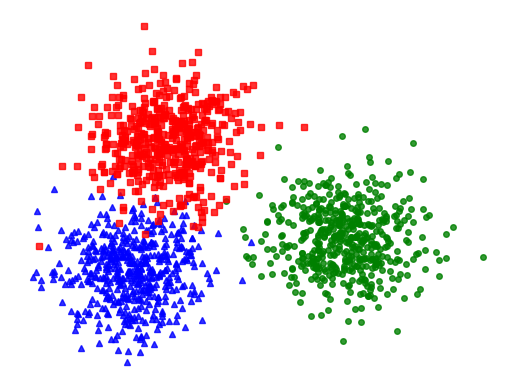

In [4]:
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()

display(X[1:,:], original_label)

xây dựng các hàm cho mô hình hồi quy logistic nhiều lớp

In [5]:
from scipy import sparse

def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this matrix
    coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position = 1.
    ex: y = [0, 2, 1, 0], separated into 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [6]:
def softmax_stable(Z):
    '''
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    '''
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    '''
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    '''
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

dự đoán

In [7]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

# W[-1] is the solution, W is all history of weights

In [8]:
# print out result of prediction
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 7.7185096  -4.36214834 -4.3371897 ]
 [-1.35894959  1.07446149 -1.24200131]
 [-0.66400756 -0.63885596  2.51028313]]


visualize result

(1, 270400)
(3, 270400)


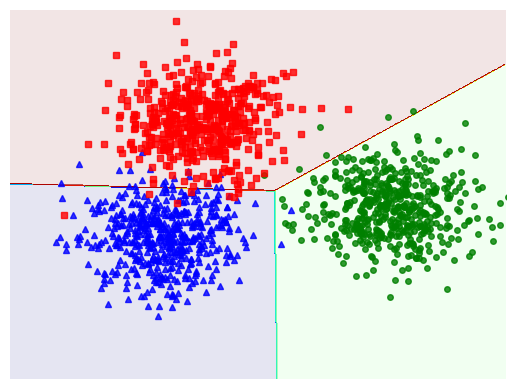

<Figure size 640x480 with 0 Axes>

In [9]:
xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

print(XX.shape)

Z = pred(W[-1], XX) # make predictions

Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())

display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()

#### Example 2. Iris

sử dụng PCA để giảm số chiều, vẽ hình trực quan hóa dữ liệu

In [10]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

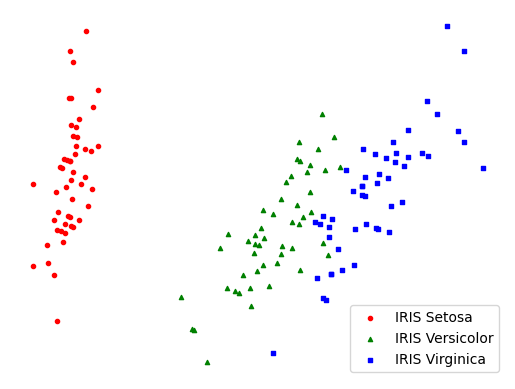

In [11]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4] # we take full 4 features
Y = iris.target

# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

# visualize
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [29]:
transformed[Y==0][0]

0    -0.344119
1    -0.347967
2    -0.370383
3    -0.351967
4    -0.349835
5    -0.292418
6    -0.361607
7    -0.336685
8    -0.370049
9    -0.342661
10   -0.321403
11   -0.334969
12   -0.357193
13   -0.413308
14   -0.339071
15   -0.305902
16   -0.336350
17   -0.339525
18   -0.282028
19   -0.331793
20   -0.296187
21   -0.326116
22   -0.412300
23   -0.295222
24   -0.302020
25   -0.321368
26   -0.316515
27   -0.328503
28   -0.338402
29   -0.337435
30   -0.331718
31   -0.308966
32   -0.339598
33   -0.333171
34   -0.338068
35   -0.367467
36   -0.336569
37   -0.359062
38   -0.382116
39   -0.332052
40   -0.355141
41   -0.365304
42   -0.384283
43   -0.308412
44   -0.283268
45   -0.348007
46   -0.325404
47   -0.364034
48   -0.326037
49   -0.346585
Name: 0, dtype: float64

##### (a) tự xây dựng các hàm từ numpy

In [13]:
# split data into training:validation set with proportion of 4:1, in which
# each class has the same number of observations in training set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=17, stratify=Y)
print(X_train.shape)
print(X_train[Y_train == 0].shape)

(120, 4)
(40, 4)


In [14]:
from scipy import sparse

def convert_labels(y, C):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), 
                          shape = (C, len(y))).toarray()
    return Y

In [15]:
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

# # cost or loss function
# def cost(X, Y, W):
#     A = softmax(W.T.dot(X))
#     return -np.sum(Y*np.log(A))

In [16]:
# print out result of prediction
eta = .05
d = X_train.shape[1]
C = 3
W_init = np.random.randn(d, C)
W_init
W = softmax_regression(X_train.T, Y_train.T, W_init, eta)
print(W[-1])

[[ 2.1311841   2.03626048 -3.93574493]
 [ 4.44963805  0.71623848 -4.45825912]
 [-5.18781051 -0.90743318  6.94818501]
 [-1.72778584 -3.10091767  6.64340912]]


In [17]:
def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [18]:
Z = pred(W[-1], X_test.T)
Z

array([1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       1, 0, 0, 2, 2, 2, 0, 2], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

cm = confusion_matrix(Y_test, Z)
print(cm)

acc = accuracy_score(Y_test, Z)
prec = precision_score(Y_test, Z, average=None)
rec = recall_score(Y_test, Z, average=None)

print('Accuracy =', acc)
print('Precision = ', prec)
print('Recall = ', rec)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy = 0.9666666666666667
Precision =  [1.         1.         0.90909091]
Recall =  [1.  0.9 1. ]


##### (b) sử dụng hàm từ thư viện scikit-learn

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data # Observed variable
Y = iris.target # Dependent variable (label)
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [21]:
# split training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# call Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5000)
# and train model by training set
lorg.fit(X_train,Y_train)

# make prediction on test set
Y_pred = lorg.predict(X_test)
Y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [22]:
# for accuracy
print('Accuracy:', accuracy_score(Y_test,Y_pred))
# for confusion matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

Accuracy: 0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
